In [1]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

In [3]:
log_dir = '/home/rbodo/.snntoolbox/data/imagenet/inceptionV3/keras/log/gui'
# path_4b = os.path.join(log_dir, '06')
path_8b = os.path.join(log_dir, '12')
# path_16b = os.path.join(log_dir, '04')
# path_32b = os.path.join(log_dir, '05')

In [13]:
# exp_4b = ExpResults(path_4b, '4 bit', '+', 'brown')
exp_8b = ExpResults(path_8b, '8 bit', '^', 'm', scale=1000)
# exp_16b = ExpResults(path_16b, '16 bit', 'o', 'green')
# exp_32b = ExpResults(path_32b, '32 bit', '*')
experiments = [exp_8b]

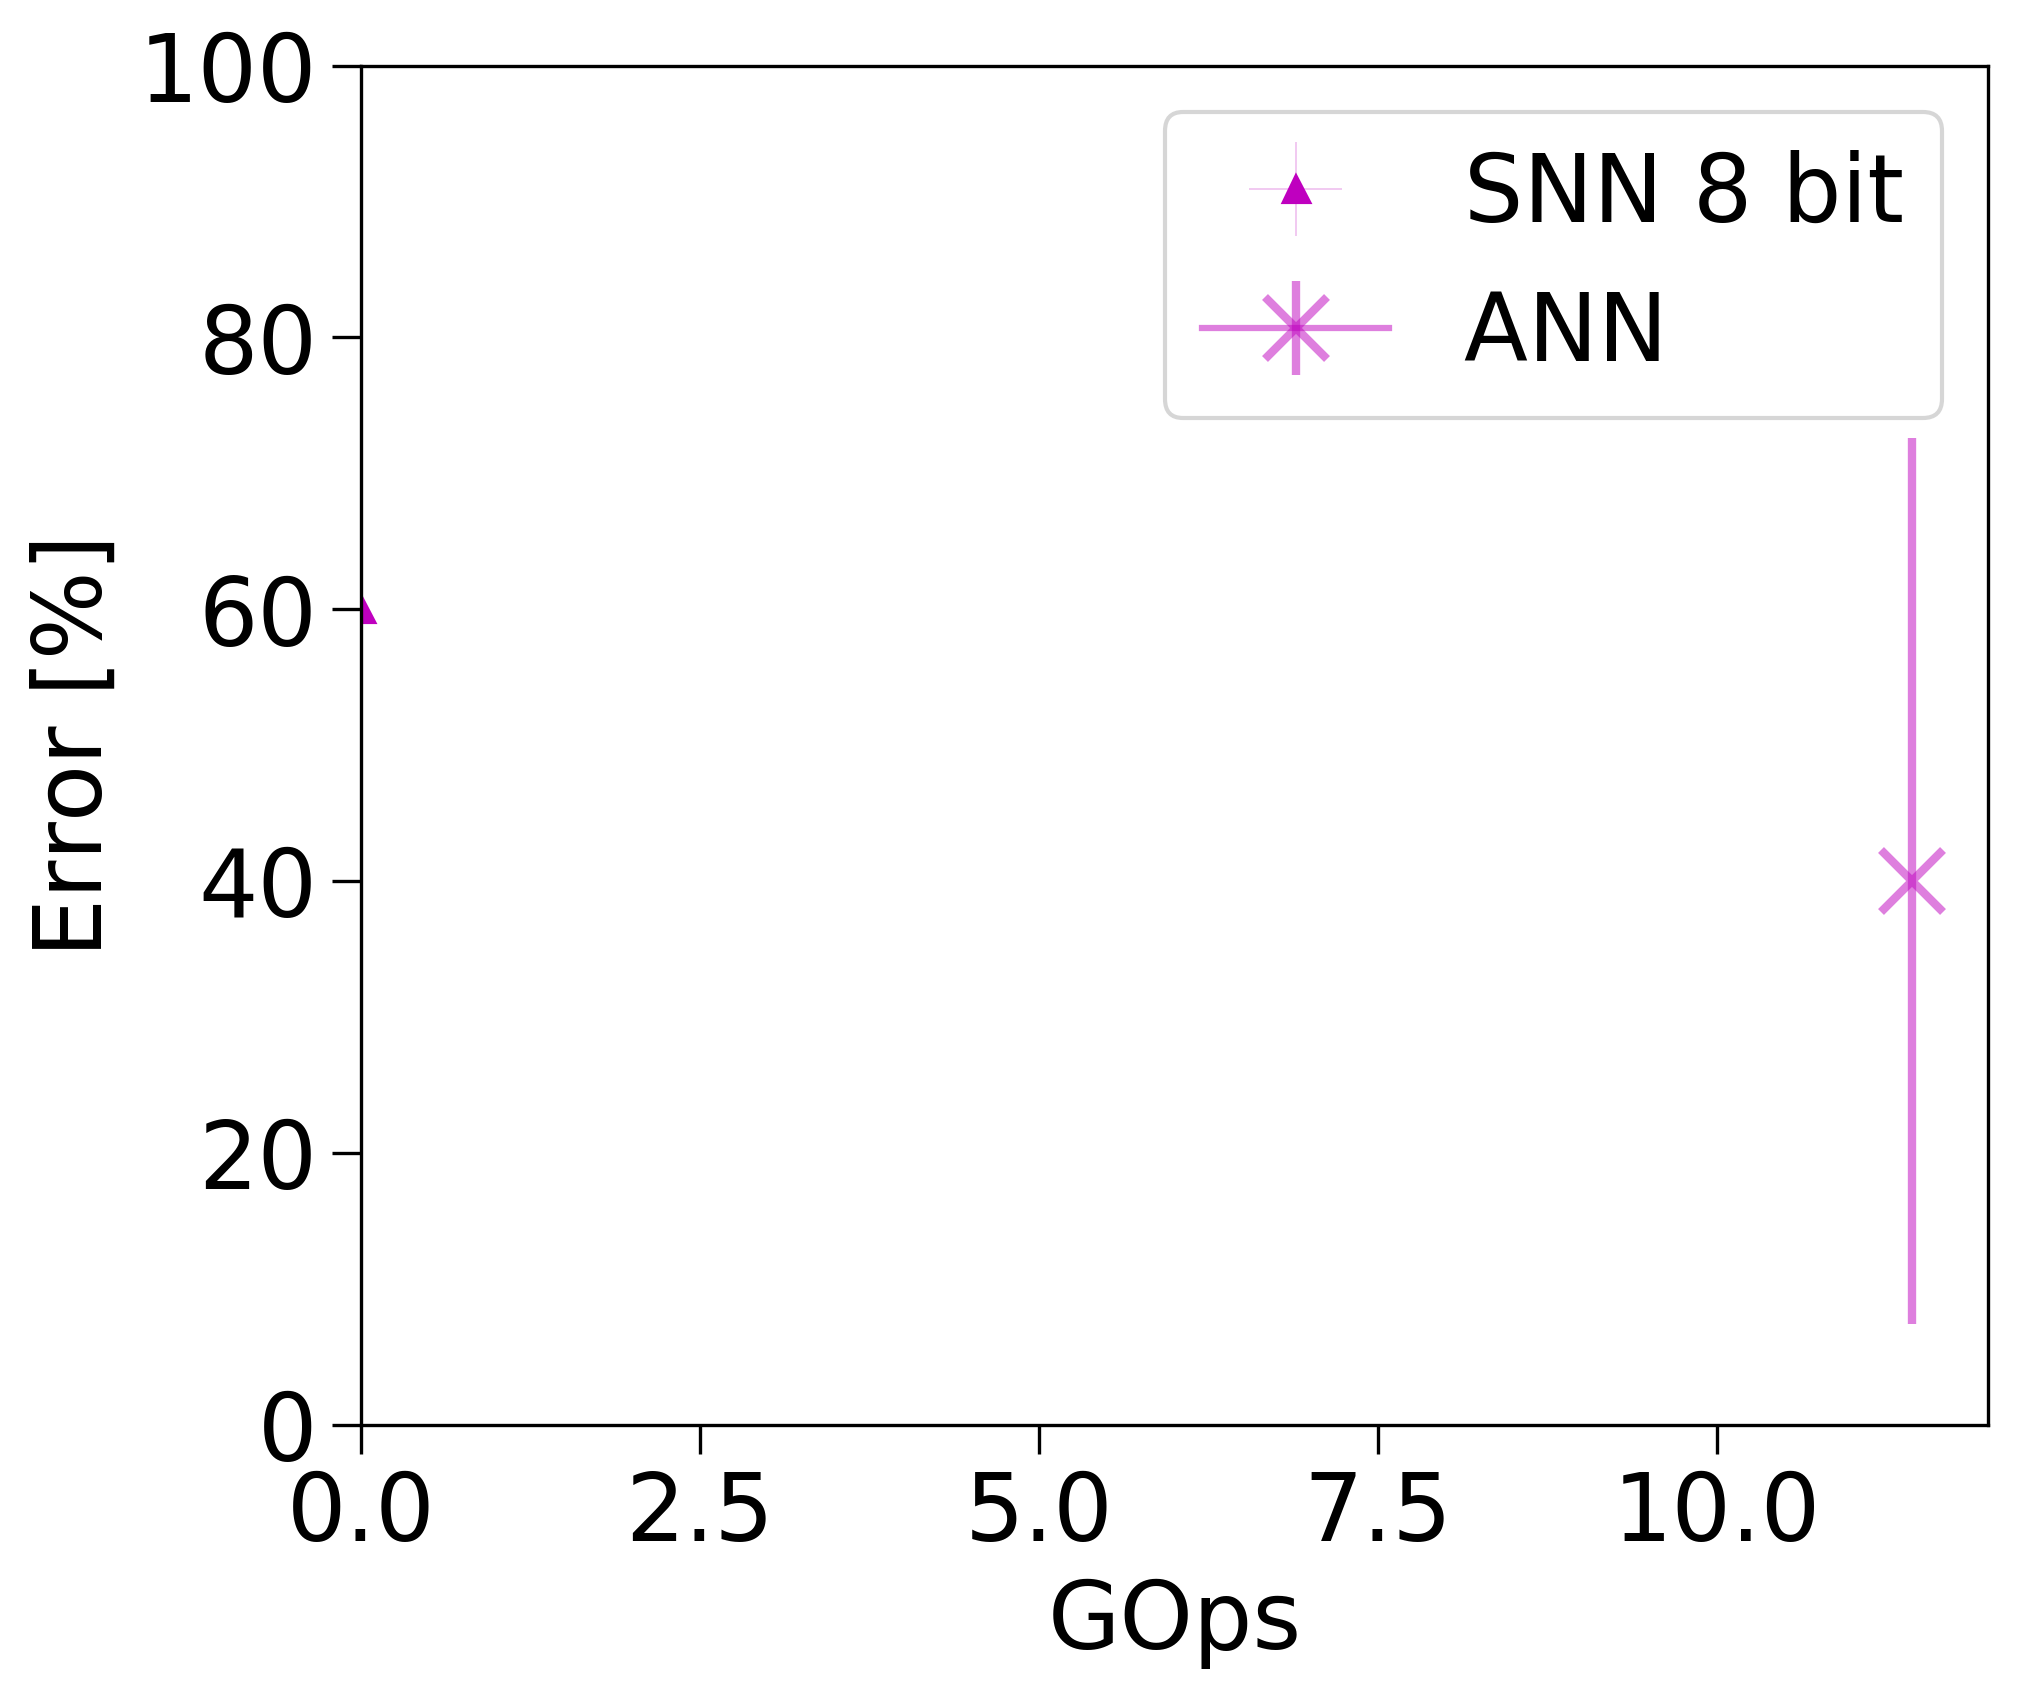

In [14]:
for exp in experiments:

    plt.errorbar(exp.mean_computations_t[-1], exp.e1_mean[-1], xerr=exp.std_computations_t[-1],
                 yerr=exp.e1_confidence95[-1], fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)
    
exp = exp_8b
plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN ', color=exp.color1, markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)
    
plt.ylim(0, 100)
plt.xlim(0, 12)
plt.ylabel('Error [%]')
plt.xlabel('GOps')
plt.legend(loc='upper right')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [15]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:   ({:.5f} GOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1:   ({:.5f} GOps/frame, {:.2f} %)'.format(exp.mean_computations_t[-1], exp.e1_mean[-1]))
    print('')

8 bit
ANN top-1:   (11.43540 GOps/frame, 40.00 %)
SNN top-1:   (0.00000 GOps/frame, 60.00 %)

